# ML Modeling

## Contents
- Pipeline in SkLearn
    - Train Test Split
- Pipeline Using the whole Data
    - Logistic Regration
    - Decision Tree Classifier
    - Random Forest Classifier
- Feature Importance
- Predicted vs Actual Plot

In [1]:
# importing important modules
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
from sklearn. decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

# Pipeline in SkLearn

In [2]:
# Load dataset
df= pd.read_csv('../data/scaled_data.csv')
df.head(5)

,type,browser_ts,geo_country,site_name,platform_os,device_type,browser,kpis,Placement(s),startdate,enddate,Serving Location(s),Cost Centre,currency,Buy Rate (CPE),Volume Agreed,Gross Cost/Budget,Percentage,Net Cost
0,2,4654,8,5700,5,0,4,6,1,20,19,7,2,6,-2.824124,2.421746,-0.087472,0.968693,-0.172359
1,2,4655,8,5700,5,0,19,6,1,20,19,7,2,6,-2.824124,2.421746,-0.087472,0.968693,-0.172359
2,2,6196,8,4805,5,0,5,6,1,20,19,7,2,6,-2.824124,2.421746,-0.087472,0.968693,-0.172359
3,2,6339,8,4805,5,0,18,6,1,20,19,7,2,6,-2.824124,2.421746,-0.087472,0.968693,-0.172359
4,2,6340,8,4805,5,0,4,6,1,20,19,7,2,6,-2.824124,2.421746,-0.087472,0.968693,-0.172359


In [3]:
df.columns.shape

(19,)

## Train Test split

In [4]:
X= df.iloc[:,1:19]
y= df['type']

print('X shape',X.shape)
print('y shape',y.shape)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=20, random_state= 30)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X shape (99946, 18)
y shape (99946,)
X_train shape (99926, 18)
X_test shape (20, 18)
y_train shape (99926,)
y_test shape (20,)


# Logistic Regression

In [11]:
# Pipeline Logistic Regression: 

pipeline_lr = Pipeline([
    ('scaler1',StandardScaler()),
    ('pca1', PCA(n_components=2)),
    ('lr_classifier', LogisticRegression(random_state=0))
])

<AxesSubplot:>

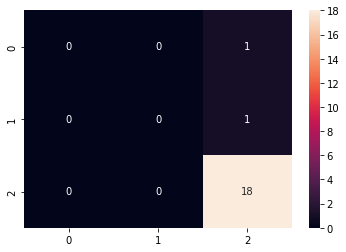

In [20]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
cm_2 = confusion_matrix(y_test,pipeline_lr.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

# Decision Tree Classifier

In [12]:
# Pipeline Decision Tree Classifier:

pipeline_dtc= Pipeline([
    ('scaler2', StandardScaler()),
    ('pca2', PCA(n_components=2)),
    ('dt_classifier', DecisionTreeClassifier())
])

<AxesSubplot:>

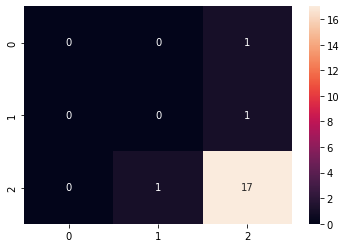

In [21]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
cm_2 = confusion_matrix(y_test,pipeline_dtc.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

# Random Forest Classifier

In [22]:
# Pipeline Random Forest Classifier:

pipeline_rfc = Pipeline([
    ('scaler3', StandardScaler()),
    ('pca2', PCA(n_components=3)),
    ('rf_classifier', RandomForestClassifier())
])

<AxesSubplot:>

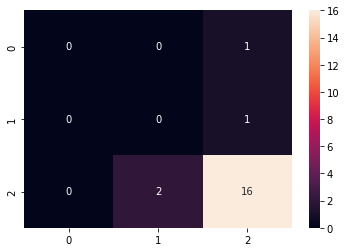

In [29]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
cm_2 = confusion_matrix(y_test,pipeline_rfc.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

In [27]:
# Make the list of pipeline: 

pipeline = [pipeline_lr,pipeline_dtc,pipeline_rfc]

best_accuracy = 0.0
best_classifier= 0
best_pipeline = ""

In [28]:
# Dictionary of pipeline and classifier types for ease of reference:

pipe_dict = { 0: 'Logistic Regression', 1: 'Decision Tree', 2:'RandomForest'}

# fit the pipleline 
for pipe in pipeline:
    pipe.fit(X_train, y_train)

In [18]:
for i, model in enumerate(pipeline):
    print('{} Test Accuracy: {}'.format(pipe_dict[i],model.score(X_test, y_test)))

Logistic Regression Test Accuracy: 0.9
Decision Tree Test Accuracy: 0.85
RandomForest Test Accuracy: 0.85


In [30]:
for i, model in enumerate(pipeline):
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy= model.score(X_test, y_test)
        best_pipeline= model
        best_classifier= i
print('classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

classifier with best accuracy:Logistic Regression


# Feature Importance

Feature ranking:
1. feature 0 (0.841629)
2. feature 2 (0.080674)
3. feature 5 (0.024701)
4. feature 9 (0.023387)
5. feature 4 (0.008068)
6. feature 3 (0.005147)
7. feature 7 (0.005144)
8. feature 14 (0.002791)
9. feature 8 (0.001796)
10. feature 15 (0.001259)
11. feature 10 (0.001190)
12. feature 17 (0.001117)
13. feature 16 (0.000857)
14. feature 1 (0.000742)
15. feature 13 (0.000569)
16. feature 11 (0.000455)
17. feature 6 (0.000378)
18. feature 12 (0.000097)


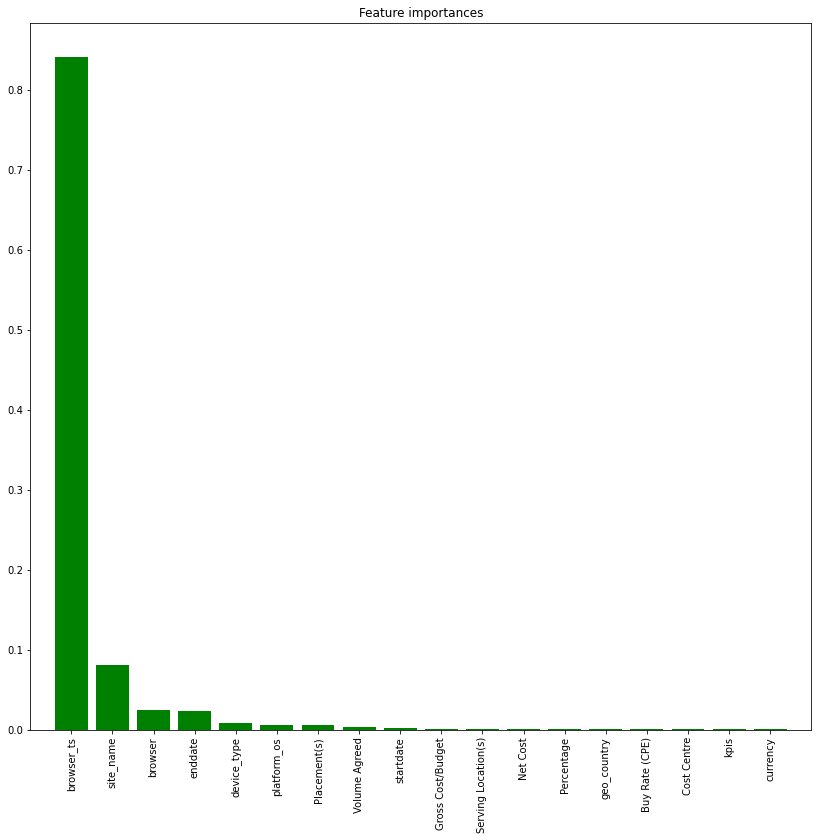

In [31]:
import matplotlib.pyplot as plt
clf_rf_5 = DecisionTreeClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
# std = np.std([tree.feature_importances_ for tree in pipeline_dtc.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Predicted vs Actual Plot

In [32]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_dt[0:10])
print("Actual:", y_test[0:10])

Predicted: [2 2 1 2 2 2 1 2 1 2]
Actual: 88705    2
43435    2
39189    2
8530     2
92596    2
21753    2
34307    2
62503    2
38143    0
80159    2
Name: type, dtype: int64


In [33]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

my_array = np.array(pred_dt)

df_prd = pd.DataFrame(my_array, columns = ['Pridicted'])

print(df_prd)
print(type(df_prd))

    Pridicted
0           2
1           2
2           1
3           2
4           2
5           2
6           1
7           2
8           1
9           2
10          2
11          2
12          2
13          2
14          2
15          0
16          2
17          2
18          2
19          2
<class 'pandas.core.frame.DataFrame'>


In [34]:
s = y_test

df_act = s.to_frame(name="Actual")
df_act.reset_index(drop=True, inplace=True)
print(df_act)
print(type(df_act))

    Actual
0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        2
8        0
9        2
10       2
11       2
12       2
13       2
14       2
15       1
16       2
17       2
18       2
19       2
<class 'pandas.core.frame.DataFrame'>


In [35]:
# result = pd.concat([df_prd, df_act], axis=1, ignore_index=True, sort='false')
result = pd.concat([df_prd, df_act], axis=1)

<AxesSubplot:>

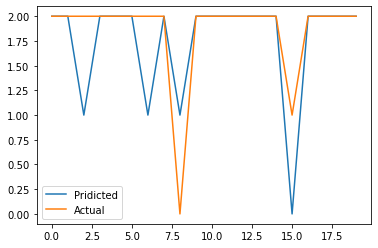

In [36]:
# plotting pridicted vs actual plot
result.plot()